# Imports and setting up viz

NB : conda env1 on Mac, lam1env on spirit (Python3.12)

In [96]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

#import personnal tools
from tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load files and edit datasets

LAM output analysis.

Simu irr et simu no-irr.

In [2]:
# one_file=xr.open_dataset('/data/ptiengou/JZ_simu_outputs/LAM/noirr_2010_2022/ATM/MO/sim12_20150101_20150131_1M_histmth.nc')
# one_file

In [3]:
noirr_dir='../../../JZ_simu_outputs/LAM/noirr_2010_2022'
irr_dir='../../../JZ_simu_outputs/LAM/irr_2010_2022'

In [16]:
#open histmth files
filename = '{}/ATM/TS*.nc'.format(noirr_dir)
# filename = '{}/ATM/MO/*.nc'.format(noirr_dir)
sim_noirr0 = xr.open_mfdataset(filename)
sim_noirr = sim_noirr0.rename({'time_counter':'time'})
sim_noirr.attrs['name'] = 'no_irr'
sim_noirr = sim_noirr.sel(lon=slice(-13,6),lat=slice(32,49))

sim_noirr['evap']=sim_noirr['evap'] * 3600 * 24
sim_noirr['evap'].attrs['units']='mm/d'
sim_noirr['precip']=sim_noirr['precip'] * 3600 * 24
sim_noirr['precip'].attrs['units']='mm/d'
sim_noirr['sens']=-sim_noirr['sens']
sim_noirr['flat']=-sim_noirr['flat']

In [19]:
filename = '{}/ATM/TS*.nc'.format(irr_dir)
# filename = '{}/ATM/MO/*.nc'.format(irr_dir)
sim_irr0 = xr.open_mfdataset(filename)
sim_irr = sim_irr0.rename({'time_counter':'time'})
sim_irr.attrs['name'] = 'irr'
sim_irr = sim_irr.sel(lon=slice(-13,6),lat=slice(32,49))

sim_irr['evap']=sim_irr['evap'] * 3600 * 24
sim_irr['evap'].attrs['units']='mm/d'
sim_irr['precip']=sim_irr['precip'] * 3600 * 24
sim_irr['precip'].attrs['units']='mm/d'
sim_irr['sens']=-sim_irr['sens']
sim_irr['flat']=-sim_irr['flat']
sim_irr0

<xarray.Dataset>
Dimensions:               (klevp1: 80, bnds: 2, klev: 79, lat: 200, lon: 200,
                           time_counter: 156, axis_nbounds: 2)
Coordinates:
  * klevp1                (klevp1) float64 1.0 2.0 3.0 4.0 ... 78.0 79.0 80.0
  * bnds                  (bnds) float32 1.0 2.0
  * klev                  (klev) float64 1.0 2.0 3.0 4.0 ... 76.0 77.0 78.0 79.0
  * lat                   (lat) float32 30.0 30.1 30.2 30.3 ... 49.8 49.9 50.0
  * lon                   (lon) float32 -13.0 -12.89 -12.79 ... 7.789 7.894 8.0
  * time_counter          (time_counter) datetime64[ns] 2010-01-16T12:00:00 ....
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    time_instant          (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: axis_nbounds
Data variables: (12/78)
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_instant_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    Ahyb                  (time_counter, klevp1) float32 dask.array<chunksize=(1, 80), meta=np.ndarray>
    Ahyb_bounds           (time_counter, bnds, klevp1) float32 dask.array<chunksize=(1, 2, 80), meta=np.ndarray>
    Bhyb                  (time_counter, klevp1) float32 dask.array<chunksize=(1, 80), meta=np.ndarray>
    ...                    ...
    q500                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    q200                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    z850                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    z700                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    z500                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
    z200                  (time_counter, lat, lon) float32 dask.array<chunksize=(1, 200, 200), meta=np.ndarray>
Attributes:
    name:         histmth
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2024-Apr-11 06:26:22 GMT
    uuid:         16ce7000-eb70-4143-840e-9dbfa727514e

In [6]:
# Select months
# months=[6,7,8]
# sim_irr = sim_irr.sel(time=sim_irr['time.month'].isin(months))
# sim_noirr = sim_noirr.sel(time=sim_noirr['time.month'].isin(months))

# Maps

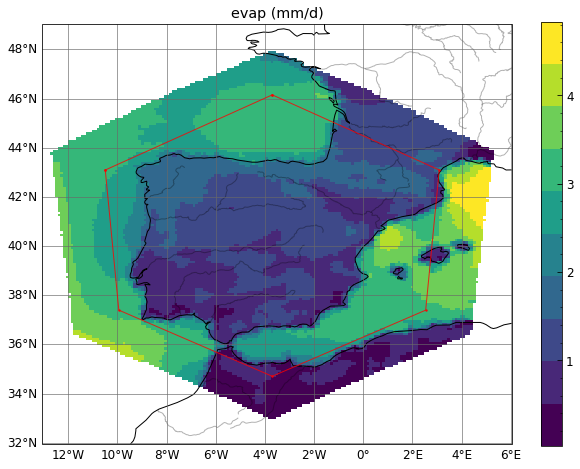

In [20]:
var='evap'
ds=sim_noirr
map_ave(ds, var, hex=True)

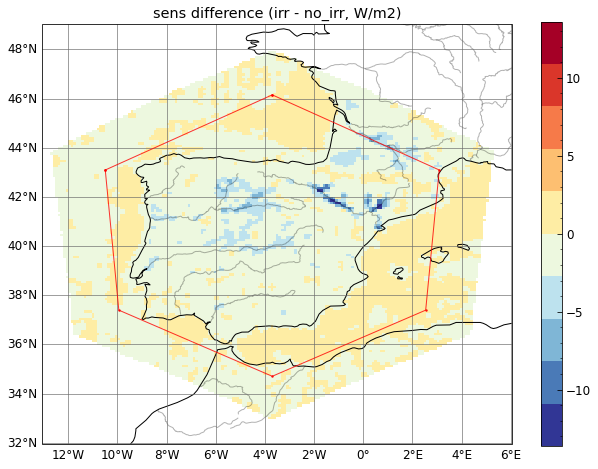

In [21]:
#Diff map
var='sens'
ds1=sim_irr
ds2=sim_noirr

map_diff_ave(ds1, ds2, var, hex=True)

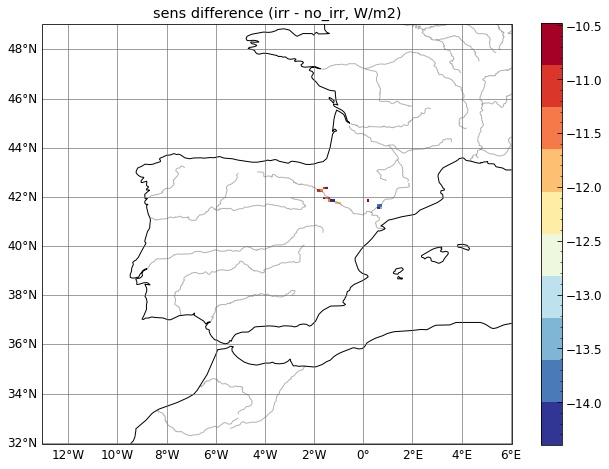

In [9]:
#Diff map with significance
var='sens'
ds1=sim_irr
ds2=sim_noirr

map_diff_ave(ds1, ds2, var, sig=True)

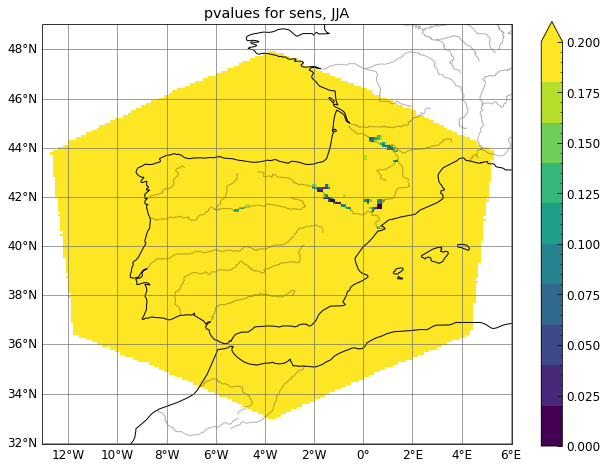

In [10]:
#pvalue plot
var='sens'
max_value=0.2
min_value=0
ds1=sim_irr
ds2=sim_noirr
p_values = xr.apply_ufunc(
    lambda x, y: ttest_ind(x, y, axis=0, nan_policy='omit').pvalue, 
    ds1[var], ds2[var],
    input_core_dims=[['time'], ['time']],
    output_core_dims=[[]],
    vectorize=True,
    dask='parallelized',
    output_dtypes=[float]
)
title='pvalues for {}, JJA'.format(var)
map_plotvar(p_values, in_vmin=min_value, in_vmax=max_value, in_title=title)

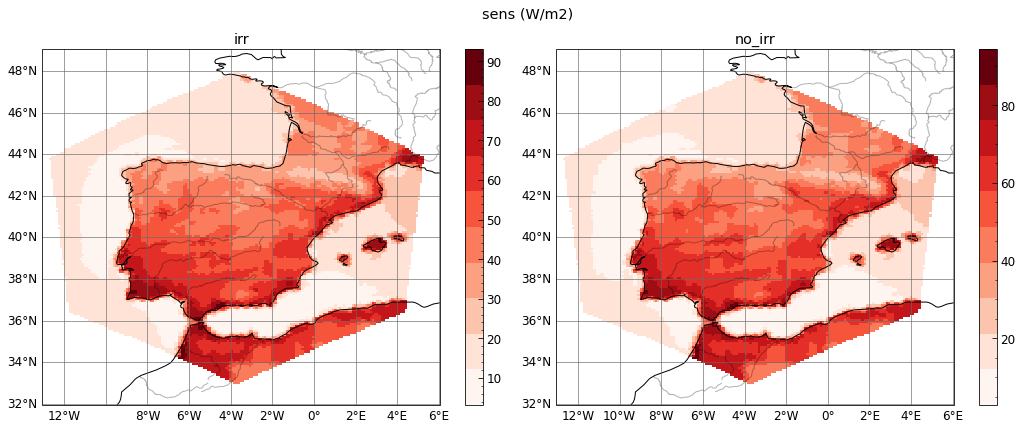

In [11]:
# Display 2 maps of var
var = 'sens'
ds1 = sim_irr
ds2 = sim_noirr
color_map=reds

map_two_ds(ds1, ds2, var, in_cmap=color_map)

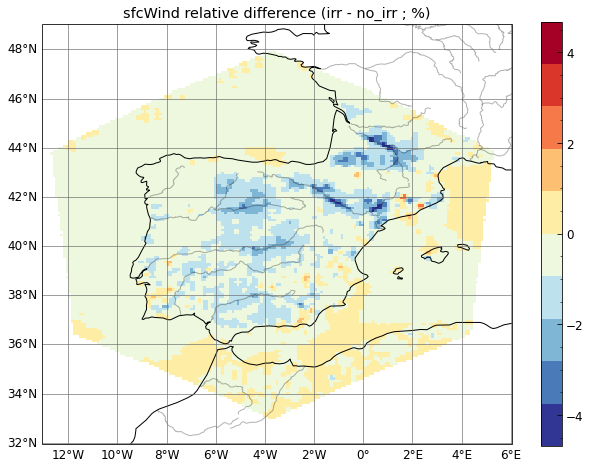

In [12]:
#Relative diff map
var='sfcWind'
maxvalue=None
ds1=sim_irr
ds2=sim_noirr

map_rel_diff_ave(ds1, ds2, var, in_vmax=maxvalue)

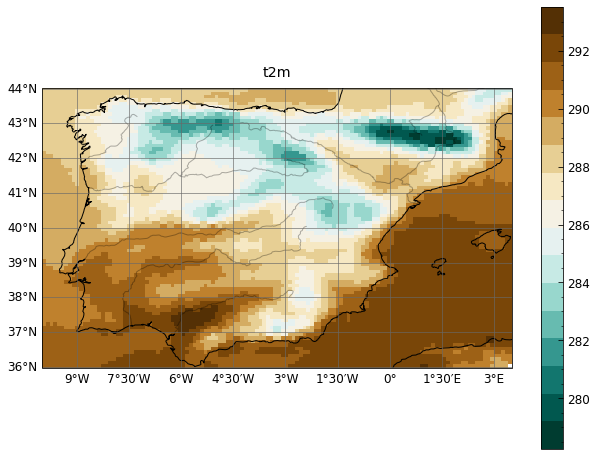

In [13]:
#Display map of var for ds on restricted area
var='t2m'
ds = sim_noirr
# ds = std
latmin=36.0
latmax=44
lonmin=-10
lonmax=3.5

#restrict ds to latmin, latmax, lonmin, lonmax
ds = ds.where(ds.lat >= latmin, drop=True).where(ds.lat <= latmax, drop=True)
ds = ds.where(ds.lon >= lonmin, drop=True).where(ds.lon <= lonmax, drop=True)
plotvar = ds[var].mean(dim='time')

map_plotvar(plotvar, in_cmap=emb_neutral, in_vmax=None, in_title=var)

# Wind

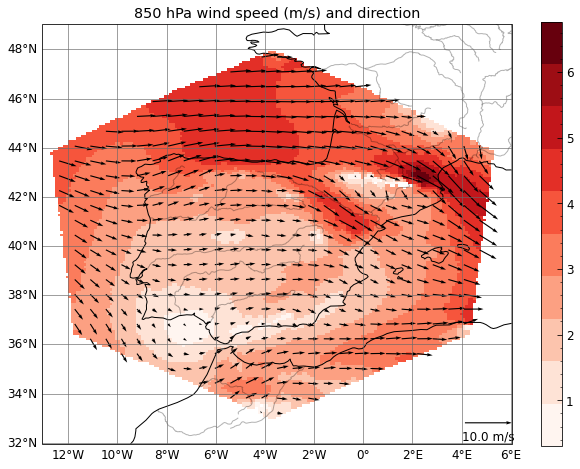

In [90]:
ds = sim_irr
dist=6
height='850'
scale=100
map_wind(ds, dist=dist, height=height, in_scale=scale)

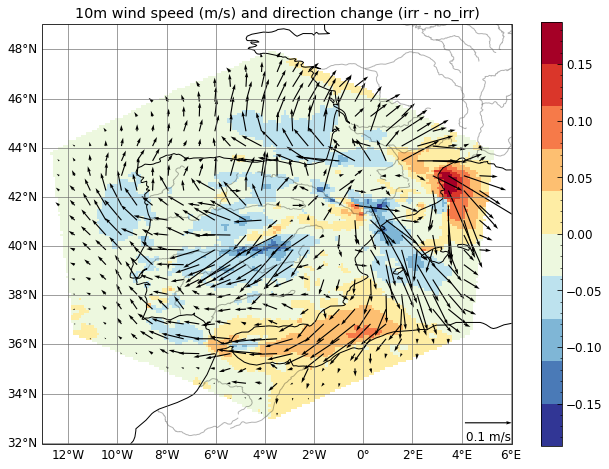

In [95]:
ds1 = sim_irr
ds1=ds1.sel(time=ds1['time.month'].isin([6,7,8]))
ds2 = sim_noirr
ds2=ds2.sel(time=ds2['time.month'].isin([6,7,8]))
dist=6
height='10m'
scale=1
map_wind_diff(ds1, ds2, dist=dist, height=height, in_scale=scale)

In [ ]:
# wind difference
ds1 = sim_irr
ds2 = sim_noirr
dist=6

#compute wind speed
wind_speed1 = (ds1['u850'][0,:,:]**2 + ds1['v850'][0,:,:]**2)**(1/2)
wind_speed2 = (ds2['u850'][0,:,:]**2 + ds2['v850'][0,:,:]**2)**(1/2)
wind_speed_diff = wind_speed1 - wind_speed2
#extract x and y (u and v) components and reduce dimension
longi=ds['lon'][::dist]
lati=ds['lat'][::dist]
windx1 = ds1['u850'][0,::dist,::dist]
windy1 = ds1['v850'][0,::dist,::dist]
windx2 = ds2['u850'][0,::dist,::dist]
windy2 = ds2['v850'][0,::dist,::dist]
windx_diff = windx1 - windx2
windy_diff = windy1 - windy2


#display map
fig = plt.figure(figsize=(10, 7.5))
ax = plt.axes(projection=ccrs.PlateCarree())
# gridline setup
ax.coastlines()
ax.add_feature(rivers)
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.8)
gl.right_labels = False
gl.top_labels = False
gl.xlocator = plt.MaxNLocator(10)
gl.ylocator = plt.MaxNLocator(9)
#use colormap reds
wind_speed_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=emb)
ax.quiver(longi, lati, windx_diff, windy_diff, transform=ccrs.PlateCarree(), scale=10)
plt.title('850hPa wind speed (m/s) and direction difference')
plt.show()


# Time series and seasonnal cycle

no_irr : 282.73 (K)
irr : 282.72 (K)


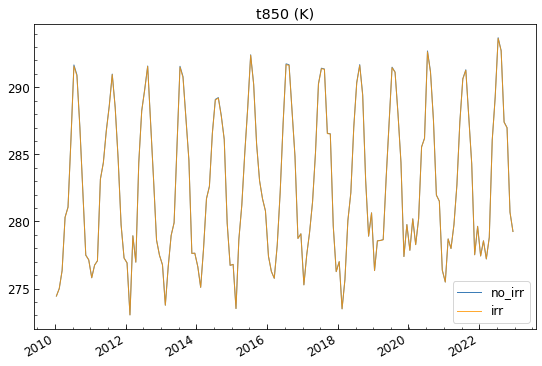

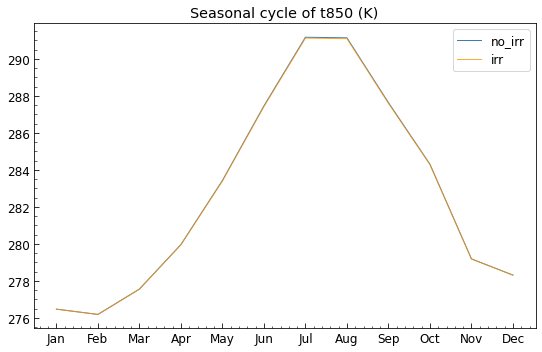

In [97]:
var='t850'

ds1=sim_noirr
ds2=sim_irr
ds_list=[ds1, ds2]

year_max=2022
time_series(ds_list, var, year_max=year_max, in_title='{} ({})'.format(var, ds1[var].attrs['units']))
seasonal_cycle(ds_list, var, year_max=year_max, in_title='Seasonal cycle of {} ({})'.format(var, ds1[var].attrs['units']))

# Vertical profiles

In [ ]:
filename='../../../JZ_simu_outputs/LAM/HF_outputs_LAM_concat/TS_MO_irr_*.nc'
lvls_irr=xr.open_mfdataset(filename)
lvls_irr.attrs["name"]='irr'
#rename time_counter to time
lvls_irr = lvls_irr.rename({'time_counter':'time'})
lvls_irr

<xarray.Dataset>
Dimensions:            (time: 156, bnds: 2, lon: 200, lat: 200, presnivs: 79)
Coordinates:
  * time               (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-12-...
  * lon                (lon) float32 -13.0 -12.89 -12.79 ... 7.789 7.894 8.0
  * lat                (lat) float32 30.0 30.1 30.2 30.3 ... 49.7 49.8 49.9 50.0
  * presnivs           (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(156, 2), meta=np.ndarray>
    ovap               (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
    temp               (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
    theta              (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jul 04 15:42:19 2024: cdo monmean TS_HF_irr_ovap.nc TS_...
    name:         irr
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Apr-08 20:57:23 GMT
    uuid:         7300fd87-6930-4a45-a625-779cb9f604f7
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [ ]:
filename='../../../JZ_simu_outputs/LAM/HF_outputs_LAM_concat/TS_MO_noirr_*.nc'
lvls_noirr=xr.open_mfdataset(filename)
lvls_noirr.attrs["name"]='no_irr'
#rename time_counter to time
lvls_noirr = lvls_noirr.rename({'time_counter':'time'})
lvls_noirr

<xarray.Dataset>
Dimensions:            (time: 156, bnds: 2, lon: 200, lat: 200, presnivs: 79)
Coordinates:
  * time               (time) datetime64[ns] 2010-01-16T12:00:00 ... 2022-12-...
  * lon                (lon) float32 -13.0 -12.89 -12.79 ... 7.789 7.894 8.0
  * lat                (lat) float32 30.0 30.1 30.2 30.3 ... 49.7 49.8 49.9 50.0
  * presnivs           (presnivs) float32 1.012e+05 1.009e+05 ... 5.297 1.483
Dimensions without coordinates: bnds
Data variables:
    time_counter_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(156, 2), meta=np.ndarray>
    ovap               (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
    temp               (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
    theta              (time, presnivs, lat, lon) float32 dask.array<chunksize=(156, 79, 200, 200), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Jul 04 11:39:30 2024: cdo monmean TS_HF_noirr_ovap.nc T...
    name:         no_irr
    description:  Created by xios
    title:        Created by xios
    timeStamp:    2024-Apr-08 20:51:54 GMT
    uuid:         ff71a600-5f34-481c-a811-7e9ab7df6246
    NCO:          netCDF Operators version 4.8.1 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [ ]:
filename = '{}/SRF/MO/*history.nc'.format(irr_dir)
orc0 = xr.open_mfdataset(filename)
orc = orc0.rename({'time_counter':'time'})


In [ ]:
orc_interp=orc.interp_like(lvls_irr)
irr_mask = (orc_interp['irrigmap_dyn']/orc_interp['Areas'])>0.1
nonirr_mask = (orc_interp['irrigmap_dyn']/orc_interp['Areas'])<=0.1

In [ ]:
lvls_irr_irrigated=lvls_irr.where(irr_mask)
lvls_irr_irrigated.attrs['name']='irrigated'
lvls_irr_nonirrigated=lvls_noirr.where(nonirr_mask)
lvls_irr_nonirrigated.attrs['name']='non_irrigated'

In [ ]:
ip_mask=polygon_to_mask(lvls_irr, iberic_peninsula)

ip_lvls_irr=lvls_irr.where(ip_mask['mask'], drop=False)
ip_lvls_irr.attrs['name']='irr'

ip_lvls_noirr=lvls_noirr.where(ip_mask['mask'], drop=False)
ip_lvls_noirr.attrs['name']='no_irr'

ip_lvls_irr_irrigated = lvls_irr.where(irr_mask).where(ip_mask['mask'], drop=False)
ip_lvls_irr_irrigated.attrs['name']='irrigated'

ip_lvls_irr_nonirrigated = lvls_irr.where(nonirr_mask).where(ip_mask['mask'], drop=False)
ip_lvls_irr_nonirrigated.attrs['name']='nonirrigated'

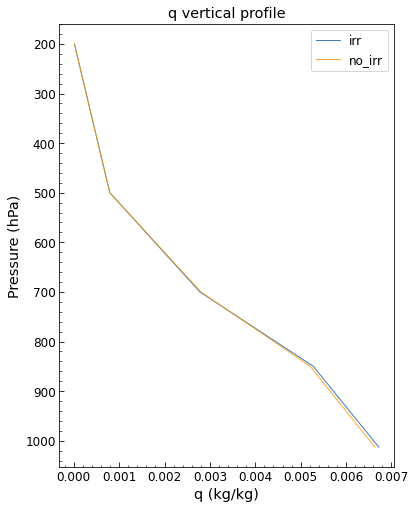

In [ ]:
# t and q profiles
#select a lon-lat box
latmin=41
latmax=43
lonmin=-2
lonmax=1
var='q'
ds1=sim_irr.sel(lon=slice(lonmin,lonmax),lat=slice(latmin,latmax))
ds2=sim_noirr.sel(lon=slice(lonmin,lonmax),lat=slice(latmin,latmax))

ds_list=[ds1, ds2]

profile_reflevs(ds_list, var)

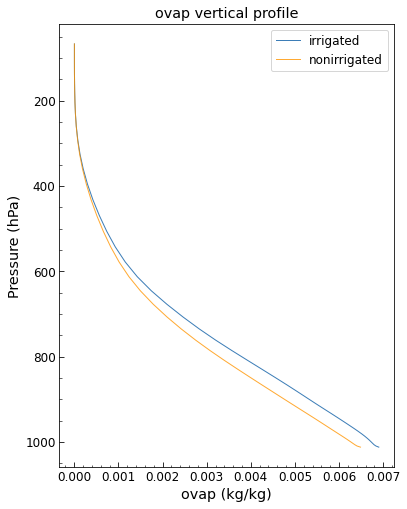

In [ ]:
# profile
preslevelmax=50
var='ovap'
# select a lon-lat box
latmin=41
latmax=43
lonmin=-2
lonmax=1
# #spain
# latmin=36
# latmax=44
# lonmin=-9.5
# lonmax=3

ds1=ip_lvls_irr_irrigated
ds1= ds1.sel(lon=slice(lonmin,lonmax),lat=slice(latmin,latmax))
#select only JJA season
# ds1=ds1.sel(time=ds1['time.month'].isin([6,7,8]))

ds2=ip_lvls_irr_nonirrigated
ds2=ds2.sel(lon=slice(lonmin,lonmax),lat=slice(latmin,latmax))
#select only JJA season
# ds2=ds2.sel(time=ds2['time.month'].isin([6,7,8]))

ds_list=[ds1, ds2]
profile_preslevs(ds_list, var, preslevelmax=preslevelmax)